In [1]:
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
file = './house_data.csv'
all_data = pd.read_csv(file)

Data checking and deleting

In [3]:
all_data.drop('id', inplace=True, axis=1)
all_data['date'] = pd.to_datetime(all_data['date'])

In [4]:
from datetime import date
all_data['building_age'] = date.today().year - all_data['yr_built']

In [5]:
all_data.drop('sqft_living15', inplace=True, axis=1)
all_data.drop('sqft_lot15', inplace=True, axis=1)
all_data.drop('yr_built', inplace=True, axis=1)
all_data.drop('date', inplace=True, axis=1)

In [6]:
all_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,building_age
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,67
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,71
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,89
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,57
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,35


In [7]:
print('MISSIN VALUES :\n')
print(all_data.isnull().sum())

MISSIN VALUES :

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
zipcode          0
lat              0
long             0
building_age     0
dtype: int64


Correlation Matrix

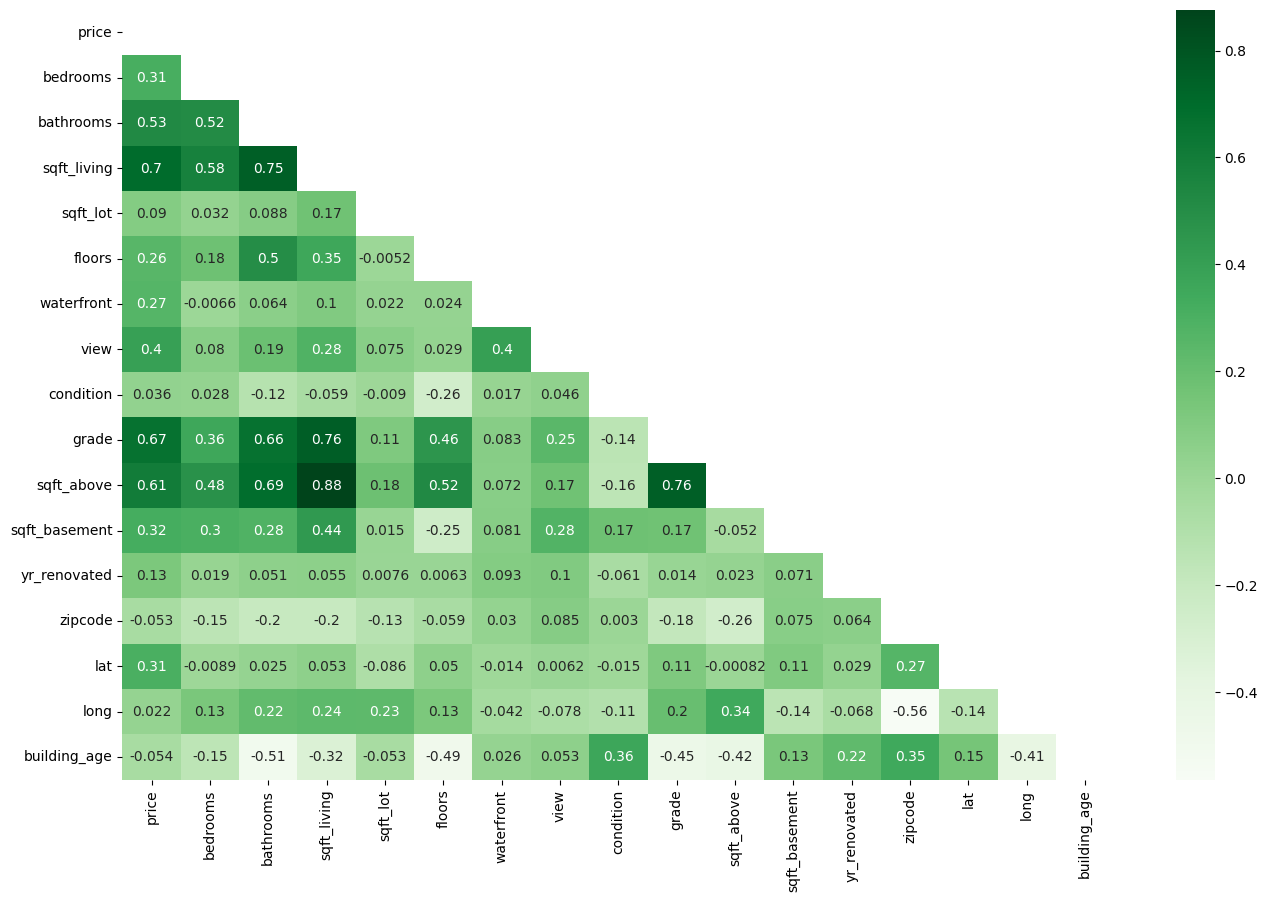

In [8]:
mask = np.zeros_like(all_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
plt.figure(figsize=(16,10))
seaborn.heatmap(all_data.corr(), cmap="Greens", mask=mask, annot=True)
plt.show()

In [9]:
all_data.describe(percentiles=[.01, .02, .03, .05, .1, .5, .9, .92, .93, .99, .999])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,building_age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,84.402258,98077.939805,47.560053,-122.213896,50.994864
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,401.679240,53.505026,0.138564,0.140828,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,47.155900,-122.519000,7.000000
1%,1.535004e+05,2.000000,1.000000,720.000000,1.013120e+03,1.000000,0.000000,0.000000,3.000000,5.000000,700.000000,0.000000,0.000000,98001.000000,47.256872,-122.408000,8.000000
2%,1.750000e+05,2.000000,1.000000,790.000000,1.184000e+03,1.000000,0.000000,0.000000,3.000000,6.000000,750.000000,0.000000,0.000000,98002.000000,47.271872,-122.398000,8.000000
3%,1.913420e+05,2.000000,1.000000,840.000000,1.305360e+03,1.000000,0.000000,0.000000,3.000000,6.000000,790.000000,0.000000,0.000000,98003.000000,47.289900,-122.393000,9.000000
5%,2.100000e+05,2.000000,1.000000,940.000000,1.800000e+03,1.000000,0.000000,0.000000,3.000000,6.000000,850.000000,0.000000,0.000000,98004.000000,47.310300,-122.387000,11.000000
10%,2.450000e+05,2.000000,1.000000,1090.000000,3.322200e+03,1.000000,0.000000,0.000000,3.000000,6.000000,970.000000,0.000000,0.000000,98008.000000,47.350300,-122.372000,15.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,-122.230000,47.000000


Outliers detection

In [10]:
from scipy import stats
stats.zscore(all_data).describe(percentiles=[0.01, 0.02, 0.03,0.05,0.95,0.97,0.98,0.99]).round(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,building_age
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000
std,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002
min,-1.26686,-3.62440,-2.74592,-1.94889,-0.35218,-0.91543,-0.08717,-0.30576,-3.70267,-5.66334,-1.80949,-0.65868,-0.21013,-1.43803,-2.91679,-2.16654,-1.49781
1%,-1.05303,-1.47396,-1.44746,-1.48070,-0.34027,-0.91543,-0.08717,-0.30576,-0.62919,-2.26034,-1.31437,-0.65868,-0.21013,-1.43803,-2.18807,-1.37833,-1.46377
2%,-0.99447,-1.47396,-1.44746,-1.40448,-0.33614,-0.91543,-0.08717,-0.30576,-0.62919,-1.40959,-1.25399,-0.65868,-0.21013,-1.41934,-2.07982,-1.30732,-1.46377
3%,-0.94995,-1.47396,-1.44746,-1.35004,-0.33321,-0.91543,-0.08717,-0.30576,-0.62919,-1.40959,-1.20568,-0.65868,-0.21013,-1.40064,-1.94971,-1.27182,-1.42972
5%,-0.89913,-1.47396,-1.44746,-1.24115,-0.32127,-0.91543,-0.08717,-0.30576,-0.62919,-1.40959,-1.13322,-0.65868,-0.21013,-1.38195,-1.80248,-1.22921,-1.36163
50%,-0.24539,-0.39874,0.17561,-0.18499,-0.18081,0.01054,-0.08717,-0.30576,-0.62919,-0.55884,-0.27581,-0.65868,-0.21013,-0.24185,0.08478,-0.11435,-0.13601
95%,1.67900,1.75171,1.79868,1.82934,0.68162,0.93651,-0.08717,2.30418,2.44429,1.99342,1.94622,2.03019,-0.21013,1.85146,1.36826,1.66800,1.90671


In [11]:
data = all_data[(np.abs(stats.zscore(all_data)) < 4).all(axis=1)]
sum_before = all_data['price'].count()
sum_after = data['price'].count()
print(sum_before, sum_after)

21613 19915


Visualization of histograms

array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'sqft_living'}>],
       [<AxesSubplot: title={'center': 'sqft_lot'}>,
        <AxesSubplot: title={'center': 'floors'}>,
        <AxesSubplot: title={'center': 'waterfront'}>,
        <AxesSubplot: title={'center': 'view'}>],
       [<AxesSubplot: title={'center': 'condition'}>,
        <AxesSubplot: title={'center': 'grade'}>,
        <AxesSubplot: title={'center': 'sqft_above'}>,
        <AxesSubplot: title={'center': 'sqft_basement'}>],
       [<AxesSubplot: title={'center': 'yr_renovated'}>,
        <AxesSubplot: title={'center': 'zipcode'}>,
        <AxesSubplot: title={'center': 'lat'}>,
        <AxesSubplot: title={'center': 'long'}>],
       [<AxesSubplot: title={'center': 'building_age'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

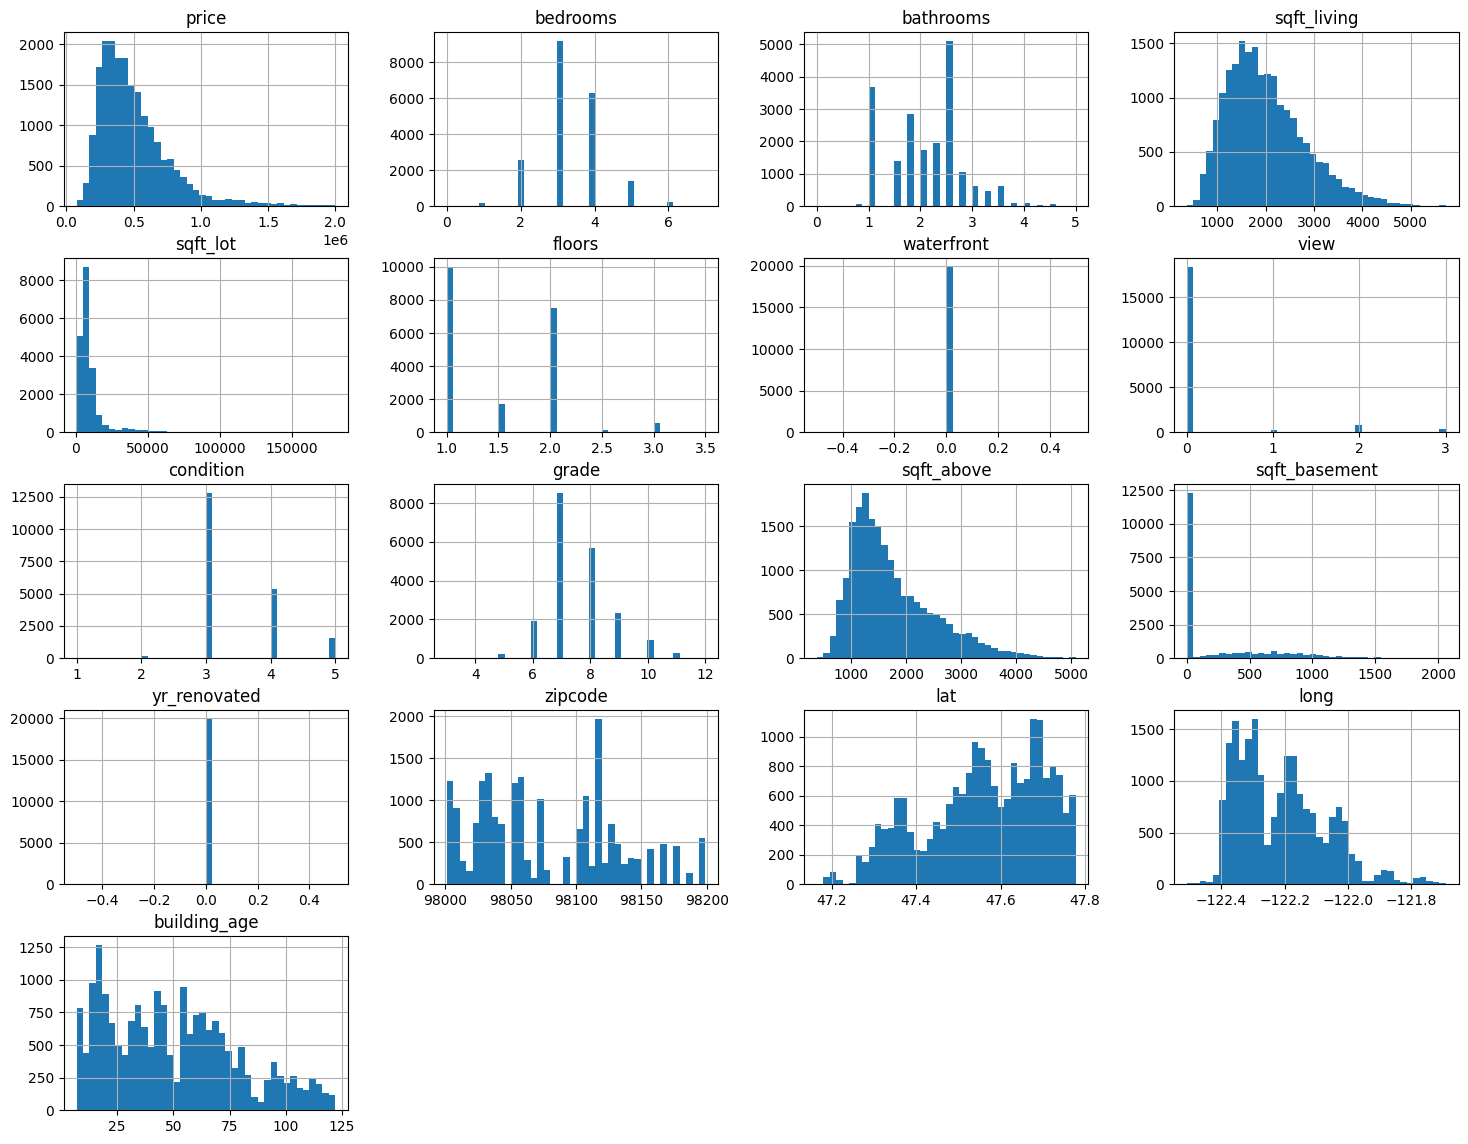

In [12]:
data.hist(bins=40, figsize=(18,14))

In [13]:
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Models building

In [14]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [15]:
models = {
    'XGBRegressor':XGBRegressor(),
    'Linear':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor()
}

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

names = []
scores = []
absolute_errors = []

for name,model in models.items():
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)

    names.append(name)
    scores.append(r2_score(y_test, predicted))
    absolute_errors.append(round(mean_absolute_error(y_test, predicted), 2))
    
    df_results = pd.DataFrame([names, scores, absolute_errors])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'Score',2:'Absolute error'}).sort_values(by='Score', ascending=False)
    
print(df_results)

c:\Users\brusa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.303e+14, tolerance: 1.002e+11
  model = cd_fast.enet_coordinate_descent(


          Model     Score Absolute error
0  XGBRegressor  0.879519       57569.65
5  RandomForest  0.877185       57648.36
4  DecisionTree  0.768413       81029.14
2         Ridge  0.684101      101790.31
3         Lasso  0.684052      101811.56
1        Linear   0.68405      101812.74


XGBRegressor Price Prediction

In [17]:
test = pd.DataFrame(X_test.copy())
test['predicted_price'] = models['XGBRegressor'].predict(X_test)
test['price'] = y_test

test['percent_error'] = np.abs((test['predicted_price']-test['price']))/test['price']*100
test = test[['price', 'predicted_price', 'percent_error']]

In [18]:
test.head()

,price,predicted_price,percent_error
18136,550000,626915.062500,13.984557
16312,198500,198082.171875,0.210493
148,258000,303918.031250,17.797687
911,615000,618542.250000,0.575976
21056,288000,276936.218750,3.841591


In [19]:
test['percent_error'].mean()

12.409928139376179

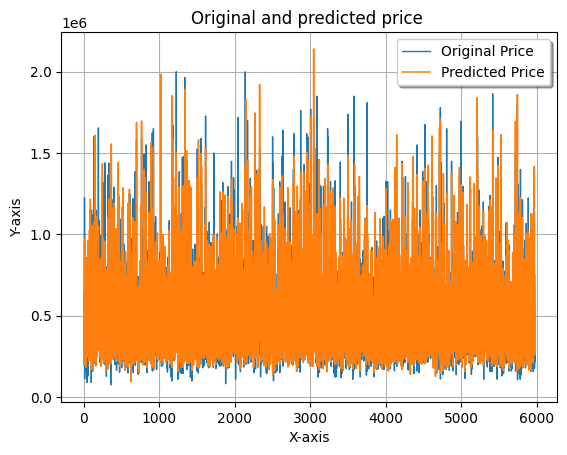

In [24]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="Original Price")
plt.plot(x_ax, test["predicted_price"], linewidth=1.1, label="Predicted Price")
plt.title("Original and predicted price ")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 